<a href="https://colab.research.google.com/github/Elma-dev/Diabetes_prediction/blob/main/Diabetes_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [8]:
diab_data=pd.read_csv('diabetes_prediction_dataset.csv')
diab_data.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [9]:
diab_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [10]:
diab_data.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


#<center>**Diabetes Prediction Analyse**</center>

##**Gender**

In [11]:
gender_count=diab_data.groupby('gender').agg('count').diabetes.to_frame().reset_index()
px.pie(data_frame=gender_count,names='gender',values='diabetes',title='gender count')

In [69]:
gender_diabetes_count=diab_data.groupby(['gender','diabetes']).count().age.to_frame().reset_index()
px.bar(data_frame=gender_diabetes_count,x='gender',y='age',color='diabetes',title='gender_vs_diabetes',labels={'age':'count'})

In [41]:
diab_smokers=diab_data.groupby(['smoking_history','diabetes']).count().age.reset_index()
px.bar(data_frame=diab_smokers,x='smoking_history',y='age',color='diabetes',title="smoking status vs diabetes",labels={'age':'count'})

<Axes: xlabel='hypertension'>

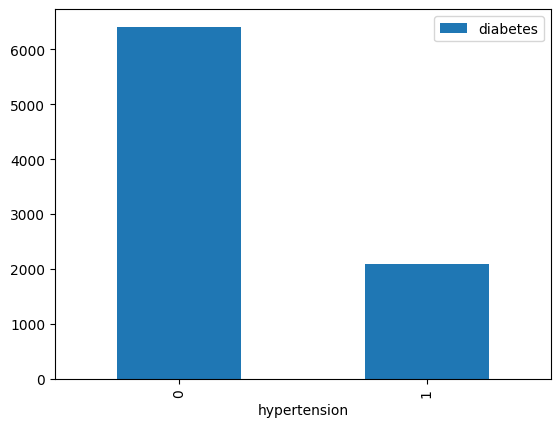

In [57]:
diabetes_hypertension=diab_data.groupby(['hypertension']).diabetes.sum().to_frame()
diabetes_hypertension.plot(kind='bar')

In [70]:
diabetes_hypertension_gender=diab_data.groupby(['gender','hypertension']).diabetes.sum().to_frame().reset_index()
px.bar(data_frame=diabetes_hypertension_gender,x='hypertension',y='diabetes',color='gender',barmode='group')

In [83]:
heart_disease_count=diab_data.groupby(['heart_disease']).count().diabetes.to_frame().reset_index()
px.pie(data_frame=heart_disease_count,names='heart_disease',values='diabetes',title='hearte_disease count')

In [87]:
disease_diabetes=diab_data.groupby(['heart_disease','diabetes']).count().age.to_frame().reset_index()
disease_diabetes

,heart_disease,diabetes,age
0,0,0,88825
1,0,1,7233
2,1,0,2675
3,1,1,1267


In [95]:
px.bar(data_frame=disease_diabetes,x='heart_disease',y='age',color='diabetes',barmode="group",labels={'age':'count'})

In [74]:
age_diab=diab_data.groupby('age').diabetes.sum().to_frame().reset_index()
px.bar(data_frame=age_diab,x='age',y='diabetes',height=400)

<Axes: xlabel='bmi', ylabel='diabetes'>

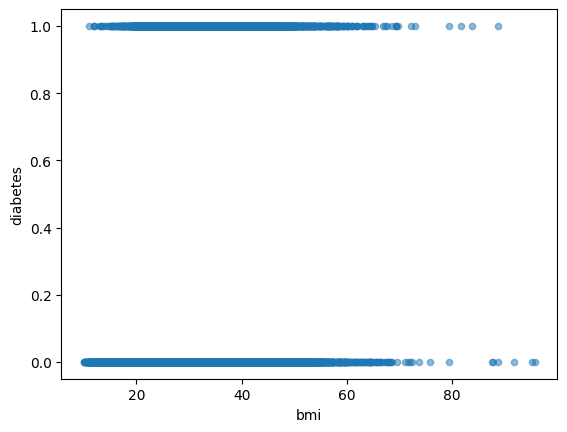

In [104]:
diab_data.plot.scatter(x='bmi',y='diabetes',alpha=0.5)